Code based on: https://github.com/keras-team/keras/blob/master/examples/mnist_mlp.py

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


# Data (MNIST)
We obtain the MNIST data set directly through Keras, given as fully labelled training and test sets.

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Each example is an image of 28x28 pixels, given as integer grayscale values from 0 to 255. Each example has a label, an integer 0 to 9. The training set contains 60,000 examples, the test set 10,000.

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


We can use matplotlib to quickly visualise some of the data.

Class label: 5


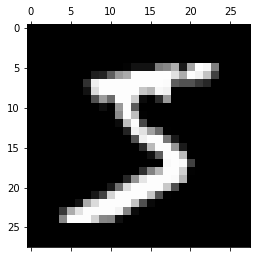

In [4]:
example_id = 0  # pick any integer from 0 to 59999 to visualize a training example
example = x_train[example_id]
label = y_train[example_id]
print("Class label:", label)
plt.matshow(example, cmap="gray")
plt.show()

MNIST digits have 28\*28=784 dimensions/pixels, and belong to one of 10 possible classes.

In [5]:
n_dims = 784  # MNIST digits have 28*28=784 dimensions/pixels
n_classes = 10

* We are going to build a multi-layer perceptron, which uses Dense layers. These layers expect the data to be given as vectors, not matrices.
* The pixel values are given by integer values from 0 to 255, we normalise this to obtain float values from 0 to 1.
* Labels are given as values 0 to 9, but here we need so-called "one-hot" encodings, e.g. 3 becomes [0,0,0,1,0,0,0,0,0,0]

In [6]:
x_train = x_train.reshape(60000, n_dims)
x_test = x_test.reshape(10000, n_dims)

x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

Observe how the shapes of the datasets have changed.

In [7]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print("example one-hot encoding:", y_train[0])

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)
example one-hot encoding: [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


# Model architecture & settings

We build an MLP with two hidden layers, with the given number of hidden units. We also include Dropout for each of the layers, with the given dropout rate.

In [8]:
intermediate_dim1 = 256
intermediate_dim2 = 128
dropout_rate = 0.2

* Initialise a Keras Sequential model
* Add two hidden (Dense) layers with ReLU activations and dropout, then a (Dense) Softmax layer with 10 classes (to obtain classification predictions summing up to 1). The first layer must explicitly receive the shape of the input, following layers can do automatice shape inference.
* Optional: print a summary of the model
* Compile the model with the following settings:
    * use stochastic gradient descent with the "adadelta" optimizer to train the model
    * MNIST is a multi-class classification problem, use categorical cross entropy loss function
    * output accuracy (% of correctly classified instances) when evaluating the model

In [9]:
model = Sequential()

model.add(Dense(intermediate_dim1, activation="relu", input_shape=(n_dims,)))
model.add(Dropout(dropout_rate))
model.add(Dense(intermediate_dim2, activation="relu"))
model.add(Dropout(dropout_rate))
model.add(Dense(n_classes, activation="softmax"))

model.summary()

model.compile(optimizer="adadelta", loss="categorical_crossentropy", metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


# Training the model
Train the model (using stochastic gradient descent) with given batch size, for given number of epochs. We split of 1/12-th of the data (5,000 of the 60,000 samples) as validation data, such that we can use the validation accuracy for hyperparameter tuning.

In [12]:
batch_size = 100
epochs = 20

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=1/12)

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 2s - loss: 0.1746 - acc: 0.9488 - val_loss: 0.0975 - val_acc: 0.9744
Epoch 2/20
55000/55000 [==============================] - 2s - loss: 0.1701 - acc: 0.9496 - val_loss: 0.0961 - val_acc: 0.9740
Epoch 3/20
55000/55000 [==============================] - 2s - loss: 0.1672 - acc: 0.9515 - val_loss: 0.0948 - val_acc: 0.9744
Epoch 4/20
55000/55000 [==============================] - 2s - loss: 0.1629 - acc: 0.9512 - val_loss: 0.0930 - val_acc: 0.9760
Epoch 5/20
55000/55000 [==============================] - 2s - loss: 0.1560 - acc: 0.9541 - val_loss: 0.0906 - val_acc: 0.9756
Epoch 6/20
55000/55000 [==============================] - 2s - loss: 0.1539 - acc: 0.9545 - val_loss: 0.0897 - val_acc: 0.9758
Epoch 7/20
55000/55000 [==============================] - 2s - loss: 0.1512 - acc: 0.9551 - val_loss: 0.0884 - val_acc: 0.9760
Epoch 8/20
55000/55000 [==============================] - 2s -

# Evaluating the model

We evaluate the model using the test set, obtaining the test loss and accuracy (% examples correctly classified)

In [11]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.135846870592
Test accuracy: 0.959
